In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress

df = pd.read_csv("cleandata/clean_df.csv")
df = df[['Unnamed: 0', 'ID', 'Name', "Team", 'Year', 'Games', 'Sport', 'Event', 'Medal','region','Population', 'Area (sq km)', 'GDP']]
df["Medal"] = df["Medal"].fillna("no")
df["Medal"].value_counts()


no        179226
Bronze      9665
Gold        9411
Silver      9261
Name: Medal, dtype: int64

In [31]:
#pivot medals and make medal calculations
medals = pd.DataFrame({
    "Medals" : df["Medal"]
})

medals = pd.get_dummies(medals)
df["Bronze"] = medals["Medals_Bronze"]
df["Silver"] = medals["Medals_Silver"]
df["Gold"] = medals["Medals_Gold"]
df["No Win"] = medals["Medals_no"]
df["Attempts"] = df["Bronze"] + df["Silver"] + df["Gold"] + df["No Win"]
df["Wins"] = df["Bronze"] + df["Silver"] + df["Gold"]
df["GDP"] = df["GDP"].replace('[^.0-9]', '', regex=True).astype(float)
df.head(1)


,Unnamed: 0,ID,Name,Team,Year,Games,Sport,Event,Medal,region,Population,Area (sq km),GDP,Bronze,Silver,Gold,No Win,Attempts,Wins
0,0,1,A Dijiang,China,1992,1992 Summer,Basketball,Basketball Men's Basketball,no,China,1182230625,9326410,4.270000e+11,0,0,0,1,1,0


In [32]:
#for looping. ignore this
# countries = df["region"].unique()
# pop = []
# Attempts = []
# Medals = []
# Bronze = []
# SIlver = []
# Gold = []
# Sq_km = []
# GDP = []
# Appearances = []
# Competitors = []


In [33]:
team_group = df.groupby(by = ["Team", "Games", "Sport", "Event", "region"], as_index= False).agg({
    "Population" : "mean",
    "Attempts" : "max",
    "Wins" : "max",
    "Area (sq km)" : "mean",
    "GDP" : "mean",
    "Bronze" : "max",
    "Silver" : "max",
    "Gold" : "max",
})

In [34]:
#Group the original DF by country name. add in relative measures
country_group = team_group.groupby(by = "region", as_index= False).agg({
    "Population" : "mean",
    "Attempts" : "sum",
    "Wins" : "sum",
    "Area (sq km)" : "mean",
    "GDP" : "mean",
    "Bronze" : "sum",
    "Silver" : "sum",
    "Gold" : "sum",
})
country_group["Win Rate"] = country_group["Wins"] / country_group["Attempts"]
country_group["Pop Density"] = country_group["Population"] / country_group["Area (sq km)"]
country_group["GDP per Capita"] = country_group["GDP"] / country_group["Population"]
country_group = country_group.sort_values("Wins", ascending= False)
country_group.head(4)

,region,Population,Attempts,Wins,Area (sq km),GDP,Bronze,Silver,Gold,Win Rate,Pop Density,GDP per Capita
150,Russia,1.409019e+08,3654.0,1498.0,16377742.0,9.373106e+11,529.0,535.0,661.0,0.409962,8.603255,6652.221906
190,USA,2.603471e+08,3997.0,1400.0,9150541.0,8.263510e+12,482.0,545.0,658.0,0.350263,28.451548,31740.364709
66,Germany,7.930590e+07,4521.0,1293.0,348672.0,1.906714e+12,482.0,478.0,485.0,0.285999,227.451295,24042.524899
39,China,1.262103e+09,1955.0,518.0,9326410.0,3.743285e+12,172.0,184.0,239.0,0.264962,135.325688,2965.911546


In [35]:
pop_medalrt = []
area_medalrt = []
gdp_medalrt = []
gdp_per_capita_medalrt = []
pop_density_medalrt = []
pop_medal_vol = []
area_medal_vol = []
gdp_medal_vol = []
gdp_per_capita_medal_vol = []
pop_density_medal_vol = []

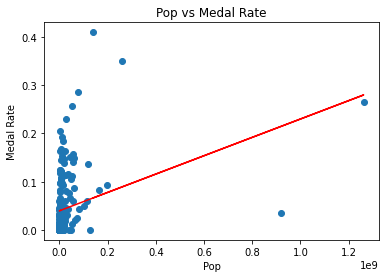

In [36]:
#POPULATION CHART
#the below snippet is for reseting the datasource and filtering if needed
country_group1 = country_group
# country_group1 = country_group1.loc[country_group["Attempts"]>= 100]

plt.clf()
x_val = country_group1["Population"]
y_val = country_group1["Win Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,5), fontsize=25,color="red")
plt.xlabel('Pop')
plt.ylabel('Medal Rate')
plt.title("Pop vs Medal Rate")
pop_medalrt.append(rvalue**2)
plt.show()

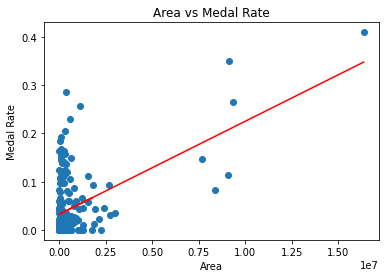

In [37]:
#AREA CHART
country_group1 = country_group
# country_group1 = country_group1.loc[country_group["Attempts"]>= 100]

plt.clf()
x_val = country_group1["Area (sq km)"]
y_val = country_group1["Win Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,5), fontsize=25,color="red")
plt.xlabel('Area')
plt.ylabel('Medal Rate')
plt.title("Area vs Medal Rate")
area_medalrt.append(rvalue**2)
plt.show()

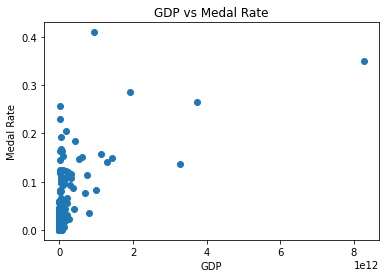

In [38]:
#GDP CHART
country_group1 = country_group
# country_group1 = country_group1.loc[country_group["Attempts"]>= 100]

plt.clf()
x_val = country_group1["GDP"]
y_val = country_group1["Win Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,5), fontsize=25,color="red")
plt.xlabel('GDP')
plt.ylabel('Medal Rate')
plt.title("GDP vs Medal Rate")
gdp_medalrt.append(rvalue**2)
plt.show()

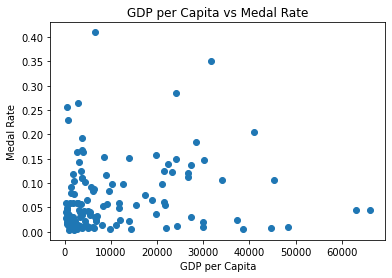

In [39]:
#GDP per Capita CHART
country_group1 = country_group.loc[country_group["Wins"] >=1]
# country_group1 = country_group1.loc[country_group["GDP per Capita"]<= 50000]

plt.clf()
x_val = country_group1["GDP per Capita"]
y_val = country_group1["Win Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,5), fontsize=25,color="red")
plt.xlabel('GDP per Capita')
plt.ylabel('Medal Rate')
plt.title("GDP per Capita vs Medal Rate")
gdp_per_capita_medalrt.append(rvalue**2)
plt.show()

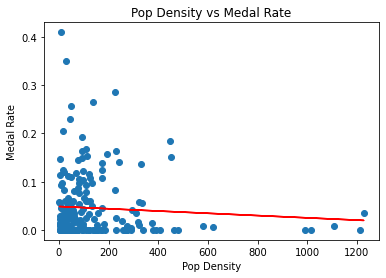

In [40]:
#Pop Density per Capita CHART
country_group1 = country_group
country_group1 = country_group1.loc[country_group["Pop Density"]<= 1750]

plt.clf()
x_val = country_group1["Pop Density"]
y_val = country_group1["Win Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,5), fontsize=25,color="red")
plt.xlabel('Pop Density')
plt.ylabel('Medal Rate')
plt.title("Pop Density vs Medal Rate")
pop_density_medalrt.append(rvalue**2)
plt.show()

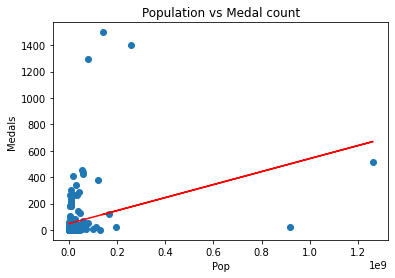

In [41]:
#POPULATION CHART vs WINS
country_group1 = country_group
# country_group1 = country_group1.loc[country_group["Attempts"]>= 100]

plt.clf()
x_val = country_group1["Population"]
y_val = country_group1["Wins"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(0,0), fontsize=25,color="red")
plt.xlabel('Pop')
plt.ylabel('Medals')
plt.title("Population vs Medal count")
pop_medal_vol.append(rvalue**2)
plt.savefig("Population_reg.png")
plt.show()

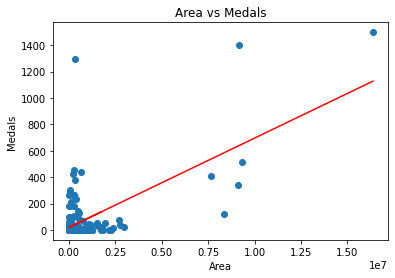

In [42]:
#AREA CHART vs WINS
country_group1 = country_group
#country_group1 = country_group1.loc[country_group["Attempts"]>= 1200]

plt.clf()
x_val = country_group1["Area (sq km)"]
y_val = country_group1["Wins"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.annotate(line_eq,(5,5), fontsize=25,color="red")
plt.xlabel('Area')
plt.ylabel('Medals')
plt.title("Area vs Medals")
area_medal_vol.append(rvalue**2)
plt.show()

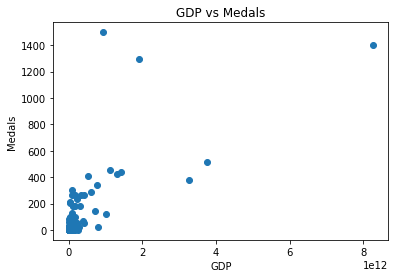

In [43]:
#GDP CHART vs WINS
country_group1 = country_group
# country_group1 = country_group1.loc[country_group["Attempts"]>= 100]

plt.clf()
x_val = country_group1["GDP"]
y_val = country_group1["Wins"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(5,5), fontsize=25,color="red")
plt.xlabel('GDP')
plt.ylabel('Medals')
plt.title("GDP vs Medals")
gdp_medal_vol.append(rvalue**2)
plt.show()

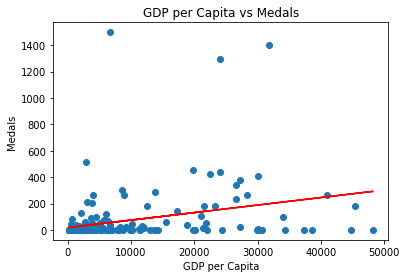

In [95]:
#GDP per Capita CHART vs WINS
country_group1 = country_group
country_group1 = country_group1.loc[country_group["GDP per Capita"]<= 50000]

plt.clf()
x_val = country_group1["GDP per Capita"]
y_val = country_group1["Wins"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(5,5), fontsize=25,color="red")
plt.xlabel('GDP per Capita')
plt.ylabel('Medals')
plt.title("GDP per Capita vs Medals")
gdp_per_capita_medal_vol.append(rvalue**2)
plt.savefig("GDP Per capita - all countries.png")
plt.show()

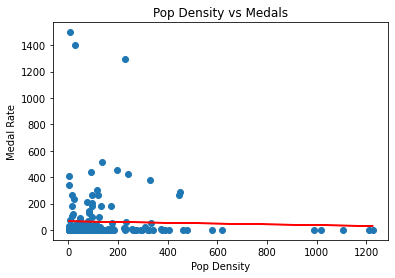

In [45]:
#Pop Density per Capita CHART vs WINS
country_group1 = country_group
country_group1 = country_group1.loc[country_group["Pop Density"]<= 1750]

plt.clf()
x_val = country_group1["Pop Density"]
y_val = country_group1["Wins"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(5,5), fontsize=25,color="red")
plt.xlabel('Pop Density')
plt.ylabel('Medal Rate')
plt.title("Pop Density vs Medals")
pop_density_medal_vol.append(rvalue**2)
plt.show()

In [46]:
country_group.corr()

,Population,Attempts,Wins,Area (sq km),GDP,Bronze,Silver,Gold,Win Rate,Pop Density,GDP per Capita
Population,1.000000,0.263737,0.293279,0.475562,0.500056,0.280983,0.289309,0.314652,0.322353,-0.017961,-0.056154
Attempts,0.263737,1.000000,0.872115,0.522195,0.642950,0.892626,0.856807,0.804500,0.780416,-0.047279,0.209254
Wins,0.293279,0.872115,1.000000,0.643429,0.727364,0.996959,0.997747,0.988712,0.802777,-0.038353,0.150493
Area (sq km),0.475562,0.522195,0.643429,1.000000,0.523386,0.629194,0.642427,0.665793,0.520716,-0.064802,-0.005713
GDP,0.500056,0.642950,0.727364,0.523386,1.000000,0.713892,0.740018,0.757750,0.560849,-0.021449,0.135780
Bronze,0.280983,0.892626,0.996959,0.629194,0.713892,1.000000,0.991920,0.976227,0.810100,-0.040363,0.155177
Silver,0.289309,0.856807,0.997747,0.642427,0.740018,0.991920,1.000000,0.991026,0.793621,-0.037454,0.151328
Gold,0.314652,0.804500,0.988712,0.665793,0.757750,0.976227,0.991026,1.000000,0.774451,-0.033123,0.134387
Win Rate,0.322353,0.780416,0.802777,0.520716,0.560849,0.810100,0.793621,0.774451,1.000000,-0.079598,0.103373
Pop Density,-0.017961,-0.047279,-0.038353,-0.064802,-0.021449,-0.040363,-0.037454,-0.033123,-0.079598,1.000000,0.476752


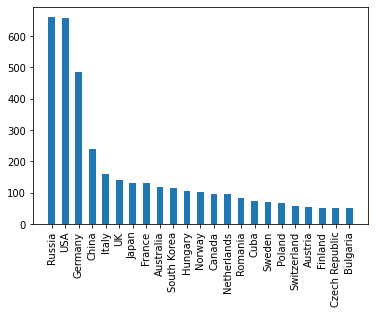

In [47]:
country_group1 = country_group
country_group1 = country_group1.loc[country_group["Gold"]>= 50]
country_group1 = country_group1.sort_values("Gold", ascending= False)
plt.bar(country_group1["region"], country_group1["Gold"], width = .5, align = "center")
plt.xticks(rotation='vertical')
plt.show()

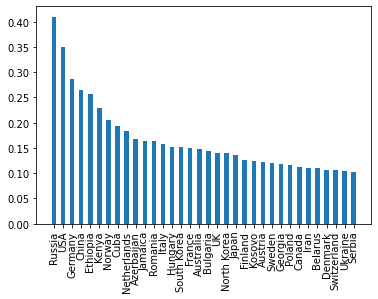

In [48]:
#Bar chart
country_group1 = country_group
country_group1 = country_group1.loc[country_group["Win Rate"]>= .1]
country_group1 = country_group1.sort_values("Win Rate", ascending= False)
plt.bar(country_group1["region"], country_group1["Win Rate"], width = .5, align = "center")
plt.xticks(rotation='vertical')
plt.show()

In [49]:
#checking USA
country_group = country_group.sort_values("Pop Density", ascending = False)
country_group.head(25)

,region,Population,Attempts,Wins,Area (sq km),GDP,Bronze,Silver,Gold,Win Rate,Pop Density,GDP per Capita
119,Monaco,2.909946e+04,105.0,0.0,2.0,3.683676e+09,0.0,0.0,0.0,0.000000,14549.728571,126589.156545
77,Hong Kong,5.934622e+06,424.0,3.0,1073.0,1.305279e+11,1.0,1.0,1.0,0.007075,5530.868223,21994.304843
138,Palestine,1.482670e+06,21.0,0.0,360.0,9.931529e+09,0.0,0.0,0.0,0.000000,4118.527381,6698.408633
14,Bahrain,9.324148e+05,84.0,3.0,760.0,1.852967e+10,1.0,1.0,1.0,0.035714,1226.861623,19872.779633
112,Malta,3.831633e+05,79.0,0.0,316.0,5.250347e+09,0.0,0.0,0.0,0.000000,1212.542061,13702.636312
21,Bermuda,5.972199e+04,118.0,1.0,54.0,2.671469e+09,1.0,0.0,0.0,0.008475,1105.962806,44731.740654
110,Maldives,3.029552e+05,40.0,0.0,298.0,1.356569e+09,0.0,0.0,0.0,0.000000,1016.628188,4477.785827
15,Bangladesh,1.288822e+08,49.0,0.0,130170.0,8.455694e+10,0.0,0.0,0.0,0.000000,990.106906,656.079213
16,Barbados,2.667554e+05,171.0,1.0,430.0,2.635561e+09,1.0,0.0,0.0,0.005848,620.361472,9880.063651
115,Mauritius,1.177299e+06,118.0,1.0,2030.0,5.941083e+09,1.0,0.0,0.0,0.008475,579.950472,5046.365426


In [50]:
R_values_df = pd.DataFrame({    
    "Population v Medal Rate" :pop_medalrt,
    "Area v Medal Rate" :area_medalrt,
    "GDP v Medal Rate" :gdp_medalrt,
    "GDP Per Capita v Medal Rate" :gdp_per_capita_medalrt,
    "Population Density v Medal Rate" :pop_density_medalrt,
    "Population v Medal Vol" :pop_medal_vol,
    "Area v Medal Vol" :area_medal_vol,
    "GDP v Medal Vol" :gdp_medal_vol,
    "GDP Per Capita v Medal Vol" :gdp_per_capita_medal_vol,
    "Population Density v Medal Vol" :pop_density_medal_vol,
    })
R_values_df

,Population v Medal Rate,Area v Medal Rate,GDP v Medal Rate,GDP Per Capita v Medal Rate,Population Density v Medal Rate,Population v Medal Vol,Area v Medal Vol,GDP v Medal Vol,GDP Per Capita v Medal Vol,Population Density v Medal Vol
0,0.103911,0.271145,NaN,NaN,0.004786,0.086013,0.414001,NaN,0.095812,0.000911


In [92]:
df_prob = df.loc[df["Year"] >= 1992]
medal_chance_df = df_prob.groupby(by = ["region", "Sport"], as_index= False).agg({
    "Population" : "mean",
    "Attempts" : "sum",
    "Wins" : "sum",
    "Area (sq km)" : "mean",
    "GDP" : "mean",
    "Bronze" : "sum",
    "Silver" : "sum",
    "Gold" : "sum",
})
try:
    medal_chance_df["Medal chance"] = medal_chance_df["Wins"] / medal_chance_df["Population"] *100
except:
    0
medal_chance_df["Medal chance"] = medal_chance_df["Medal chance"].astype(float)
medal_chance_df = medal_chance_df.sort_values("Medal chance", ascending= False)
medal_chance_df["Country Sport"] = medal_chance_df["region"] + " | " + medal_chance_df["Sport"]
medal_chance_df.head()

,region,Sport,Population,Attempts,Wins,Area (sq km),GDP,Bronze,Silver,Gold,Medal chance,Country Sport
239,Bahamas,Athletics,3.026947e+05,169.0,36.0,10010.0,8.609038e+09,13,11,12.0,0.011893,Bahamas | Athletics
1302,Iceland,Handball,2.971553e+05,57.0,14.0,100250.0,1.343998e+10,0,14,0.0,0.004711,Iceland | Handball
1482,Jamaica,Athletics,2.777692e+06,401.0,125.0,10831.0,1.078240e+10,38,56,31.0,0.004500,Jamaica | Athletics
985,Finland,Ice Hockey,5.244277e+06,254.0,152.0,303815.0,1.867795e+11,129,23,0.0,0.002898,Finland | Ice Hockey
1900,Montenegro,Handball,6.200343e+05,29.0,14.0,13452.0,4.237368e+09,0,14,0.0,0.002258,Montenegro | Handball


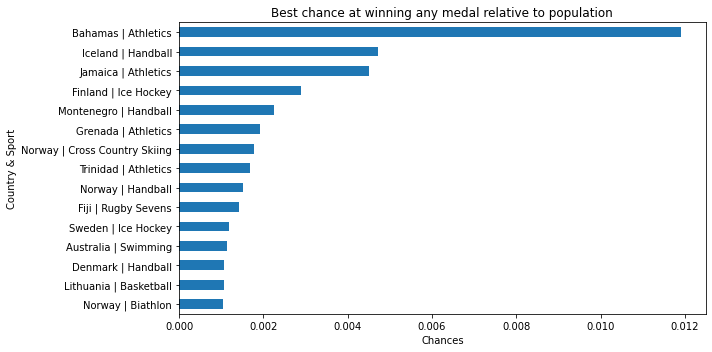

In [93]:
bar_chart = medal_chance_df[["Country Sport", "Medal chance"]]
bar_chart = bar_chart.set_index("Country Sport")
bar_chart = bar_chart.nlargest(15, "Medal chance")
bar_chart = bar_chart.sort_values("Medal chance", ascending=True)
medalsbar = bar_chart.plot(kind="barh", title=("Best chance at winning any medal relative to population"), legend = False, figsize=(10, 5))
medalsbar.set_xlabel("Chances")
medalsbar.set_ylabel("Country & Sport")
plt.tight_layout()
plt.savefig("Probability Bar.png")
plt.show()